### GRADCAM

In [0]:
# importing important libraries
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2

from skimage import io

In [3]:
# loading the pretrained vgg16 model
model = VGG16(weights="imagenet")





553467904/553467096 [==============================] - 16s 0us/step








In [0]:
# loading the image on which gradcam will be applied and the preprocessing required for the vgg16 model
dog = io.imread("https://www.rspcapetinsurance.org.au/rspca/media/images/hero/dog-insurance-hero.jpg")
dog = cv2.resize(dog, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(dog)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [7]:
# prediction on the selected image
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
class_output = model.output[:, class_idx]

153


In [8]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
# the layer, based on which the gradcam will be calculated
last_conv_layer = model.get_layer("block5_conv3")

In [0]:
# calculate the gradient on output based on the conv layer feature map
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [0]:
# generating the heatmap which will be merged on top of original image to visualize the gradcam
heatmap = np.mean(conv_layer_output_value, axis = -1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

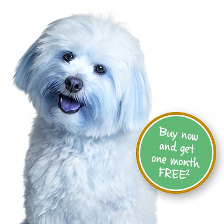

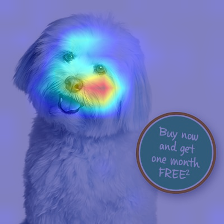

In [15]:
# visualizing the results using the heatmap
heatmap = cv2.resize(heatmap, (dog.shape[1], dog.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(dog, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( dog)
cv2_imshow(superimposed_img)

In [0]:
# selecting the layer one layer before the previous selected layer, that is "block5_conv2"
last_conv_layer = model.get_layer("block5_conv2")

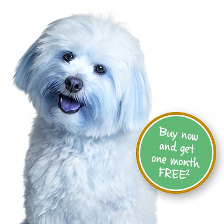

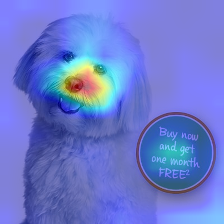

In [17]:
# following all the previous stesp for gradcam
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis = -1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

heatmap = cv2.resize(heatmap, (dog.shape[1], dog.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(dog, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( dog)
cv2_imshow(superimposed_img)

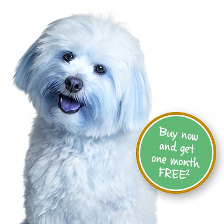

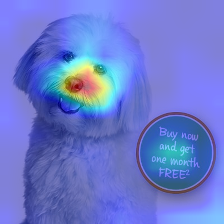

In [18]:
# selecting layer one layer before the previous layer, that is "block5_conv2"
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

heatmap = np.mean(conv_layer_output_value, axis = -1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

heatmap = cv2.resize(heatmap, (dog.shape[1], dog.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(dog, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( dog)
cv2_imshow(superimposed_img)

In [0]:
# loading the given image of Robert Downey, Jr for showing gradcam on his sunglasses as well as 
robert = io.imread("https://i.ibb.co/9ZxnBSB/robert.jpg")
robert = cv2.resize(robert, dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
x = image.img_to_array(robert)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

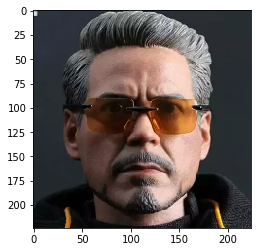

In [26]:
import matplotlib.pyplot as plt
plt.imshow(robert)

In [0]:
# the index number for the sunglasses class in imagenet is 535. Refer the link below
# https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

In [30]:
# prediction on the selected image
preds = model.predict(x)
class_idx = np.argmax(preds[0])
print(class_idx)
sunglasses_class_idx = 837
class_output = model.output[:, sunglasses_class_idx]

837


In [0]:
# the layer, based on which the gradcam will be calculated
last_conv_layer = model.get_layer("block5_conv3")

In [0]:
# calculate the gradient on output based on the conv layer feature map
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

pooled_grads_value, conv_layer_output_value = iterate([x])

for i in range(512):
  conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [0]:
# generating the heatmap which will be merged on top of original image to visualize the gradcam
heatmap = np.mean(conv_layer_output_value, axis = -1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

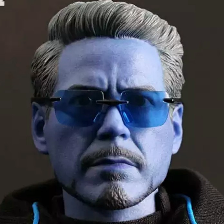

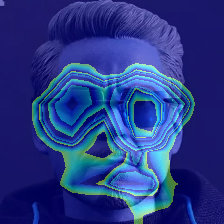

In [37]:
# visualizing the results using the heatmap
heatmap = cv2.resize(heatmap, (robert.shape[1], robert.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(robert, 0.5, heatmap, 0.5, 0)
from google.colab.patches import cv2_imshow
cv2_imshow( robert)
cv2_imshow(superimposed_img)